In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
import visuals as vs

%matplotlib inline


In [6]:
df=pd.read_csv('housing.csv')
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [7]:
prices=df['MEDV']
features=df.drop('MEDV',axis=1)
print("Boston housing dataset has {} data points with {} variables each.".format(*df.shape))


Boston housing dataset has 489 data points with 4 variables each.


In [8]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429477


Question 1 - Feature Observation
Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an increase in the value of 'MEDV' or a decrease in the value of 'MEDV'? Justify your answer for each.


Answer:

- Increase in the value of 'RM' would increase the value of 'MEDV' Because houses with more rooms can fit more people so they will cost more money

- Higher ‘LSTAT’ value will worth less. than area's with lower 'LSTAT', Because  they have low purchasing power and therefore, they houses will cost less

- Neighborhoods with more students to teachers ratio (higher ‘PTRATIO’ value) will be worth less. If the percentage of students to teachers ratio people is higher, it is likely that in the neighborhood there are less schools, this could be because there is less tax income which could be because in that neighborhood people earn less money. If people earn less money it is likely that their houses are worth less.

In [9]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

In [10]:
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


Question 2 - Goodness of Fit 
Would you consider this model to have successfully captured the variation of the target variable?
Why or why not?

Answer :
- Model has a coefficient of determination, R^2, of 0.923.
- R^2=92.3%
-  92.3% of variation is explained by the target variable and it seems to be high.
- We have only 5 datapoints so we can't conclude that is statistically significant.

In [11]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices , test_size = 0.2, random_state=21)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


Question 3 - Training and Testing
What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

Answer :
- We split the data to 2 sets training set and test set and we use the first one to train our teach our model how to use the data and the test set we use it to know the percentage of data that the model correctly predicted.
    - 1) The model didn´t learn well on the data, and can’t predict even the outcomes of the training set, this is called underfitting and it is caused because a high bias.

    2) The model learn too well the training data, up to the point that it memorized it and is not able to generalize on new data, this is called overfitting, it is caused because high variance.

    3) The model just had the right balance between bias and variance, it learned well and is able predict correctly the outcomes on new data.

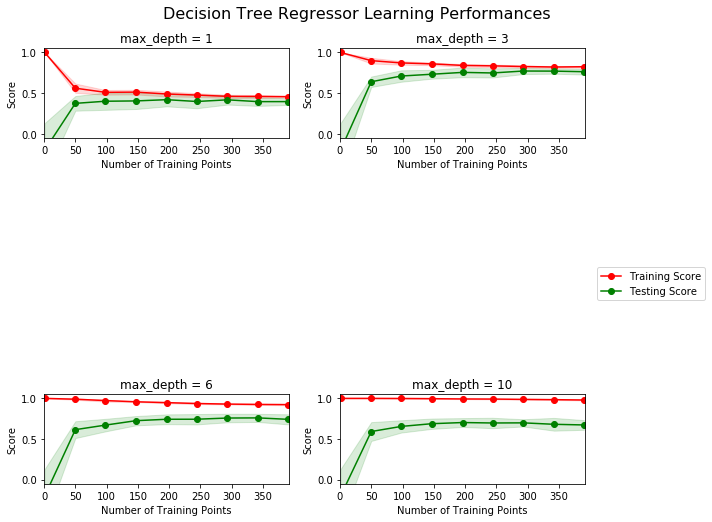

In [27]:
vs.ModelLearning(features, prices)

Question 4 - Learning the Data
- Choose one of the graphs above and state the maximum depth for the model.
- What happens to the score of the training curve as more training points are added? What about the testing curve?
- Would having more training points benefit the model?

Answer :
    If we take a close look at the graph with the max depth of 3:

- As the number of training points increases, the training score decreases. In contrast, the test score increases.
- As both scores (training and testing) tend to converge, from the 300 points treshold, having more training points will not benefit the model.
- In general, with more columns for each observation, we’ll get more information and the model will be able to learn better from the dataset and therefore, make better predictions.

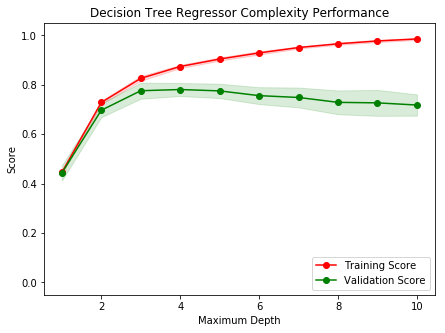

In [28]:
vs.ModelComplexity(X_train, y_train)


Question 5 - Bias-Variance Tradeoff
- When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance?
- How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

Answer :
- With the maximun depth of one, the graphic shows that the model does not return good score in neither training nor testing data, which is  underfitting and so, it's a high bias. to solve it we must increase the max depth
- With the maximun depth of ten, the graphic shows that the model learn perfectly well from training data (with a score close to one) and also returns poor results on test data, which is an indicator of overfitting,it's a high variance to solve it we should decrease the max depth.

Question 6 - Best-Guess Optimal Model
- Which maximum depth do you think results in a model that best generalizes to unseen data?
- What intuition lead you to this answer?

Answer :
    
    -Tthe best maximum depth for the model is 4, as it is the one that yields the best validation score.
    
    -For more depth although the training score increases, validation score tends to decrease which is a sign of overfitting.



Question 7 - Grid Search
- What is the grid search technique?
- How it can be applied to optimize a learning algorithm?

Answer :
-  The Grid search technique allows us to define a grid of the hyperparameters for a specific classifier and then the Grid search technique exhaustively tries out every possible combinations of the hyperparameters values in order to find the best model. After that we can use cross validation techniques like K-fold cross validation or Stratified Shuffle Split to find the highest accuracy by using the hyperparameters suggested by Grid Search technique optimizing the learning algorithm.

- EX: param_grid = [ {‘C’: [1, 10, 100, 1000], ‘kernel’: [‘linear’]}, {‘C’: [1, 10, 100, 1000], ‘gamma’: [0.001, 0.0001], ‘kernel’: [‘rbf’]}, ]
- In this example, two grids should be explored: one with a linear kernel an C values of [1,10,100,1000], and the second one with an RBF kernel, and the cross product of C values ranging in [1, 10, 100, 1000] and gamma values in [0.001, 0.0001].

- When fitting it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained.   
- we can use GrideSearch() and pass estimator,param_grid,cv as parameters 

Question 8 - Cross-Validation
- What is the k-fold cross-validation training technique?

- What benefit does this technique provide for grid search when optimizing a model?

Answer :
    - K-fold cross-validation is a technique used for making sure that our model is well trained, without using the test set. It consist in splitting data into k partitions of equal size. For each partition i, we train the model on the remaining k-1 parameters and evaluate it on partition i. The final score is the average of the K scores obtained.
    
   -    - More reliable estimate of out-of-sample performance than train/test split.
        - Reduce the variance of a single trial of a train/test split.

In [12]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':np.arange(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

Question 9 - Optimal Model
- What maximum depth does the optimal model have? How does this result compare to your guess in Question 6?

In [13]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


Answer :
    - The max depth for the optimal model is 4 
    - The depth is the same value that i had predicted in Q6
    
   - Both results are reliable as in both cases, we did cross validation with Shufflesplit combined with checking against a range of the max_depth hyperparamters to give us the most optimal value of the max_depth. So based on our course of action, there is very little chance that our model will work poorly for unknown datasets because of high variance.

Question 10 - Predicting Selling Prices 
- What price would you recommend each client sell his/her home at?
- Do these prices seem reasonable given the values for the respective features?

In [45]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))


Predicted selling price for Client 1's home: $407,400.00
Predicted selling price for Client 2's home: $230,508.51
Predicted selling price for Client 3's home: $888,720.00


Aanwser :
    - Predicted selling price for Client 1's home: $407,400.00
   - Predicted selling price for Client 2's home: $230,508.51
    - Predicted selling price for Client 3's home: $888,720.00


- Minimum price: $105000.0
- Maximum price: $1024800.0
- Mean price: $454342.944
- Median price $438900.0
- Standard deviation of prices: $165340.277

Reasonableness

- The prices are rounded up to the nearest hundred as the prices in the dataset are all rounded to the nearest hundred.
- Compared to the data-exploration, it seems that the houses' prices from client 1 and client 2 are below the mean and median prices.
- For client 2, it seems reasonable due to the high poverty level and student-to-teacher ratio.
- For client 1, it also seems reasonable due to the average poverty level and student-to-teacher ratio.
- And the house's price from client 3 is way above the mean and median prices, nearing to the maximum price in the dataset.
- This seems reasonable given the low poverty level and student-to-teacher ratio with a high number of rooms.


In [46]:
vs.PredictTrials(features, prices, fit_model, client_data)


Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


Question 11 - Applicability
- In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.


Answer :
 
- Data collected from a rural city may not be applicable as the demographics would change and other features may be better able to fit the dataset instead of a model with features that was learned using urban data.
- The learning algorithm learned from a very old dataset that may not be relevant because demographics have changed a lot since 1978.
- There are only 3 features currently, there are more features that can be included such as crime rates, nearby to city, public transport access and more.